## Best Hybrid approach of LDA models passed into an ANN model using SMOTE technique for NHANES.

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Set directory path
import os
os.chdir("/content/drive/My Drive/COMP-5800-YDK-2020_Group1")

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np

In [4]:
demoData = pd.read_csv('ImputedDataset/DemographicsData.csv')
dietData = pd.read_csv('ImputedDataset/DietaryData.csv')
examData = pd.read_csv('ImputedDataset/ExaminationData.csv')
labData = pd.read_csv('ImputedDataset/LaboratoryData.csv')
questionData = pd.read_csv('ImputedDataset/QuestionnaireData.csv')
hypertensionData = pd.read_csv('ImputedDataset/HypertensionData.csv')

In [5]:
import keras
import tensorflow as tf
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, LeakyReLU
from keras.layers.normalization import BatchNormalization

Demographics Feature Extraction

In [6]:
demoData.drop('SEQN', axis=1, inplace = True)
dietData.drop('SEQN', axis=1, inplace = True)
examData.drop('SEQN', axis=1, inplace = True)
labData.drop('SEQN', axis=1, inplace = True)
questionData.drop('SEQN', axis=1, inplace = True)
hypertensionData.drop('SEQN', axis=1, inplace = True)

In [7]:
demoData.shape

(8366, 29)

In [8]:
dietData.shape

(8366, 43)

In [9]:
examData.shape

(8366, 137)

In [10]:
labData.shape

(8366, 189)

In [11]:
questionData.shape

(8366, 776)

In [12]:
hypertensionData.shape

(8366, 665)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from collections import Counter

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [14]:
y = hypertensionData['Target']

## Train Test split after oversampling the data using SMOTE

In [15]:
oversample = SMOTE(random_state = 42)

In [16]:
demoX_train, demoX_test, demoY_train, demoY_test = train_test_split(demoData, y, test_size=0.33, random_state=42)

In [17]:
demoX_train, demoY_train = oversample.fit_resample(demoX_train, demoY_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [18]:
demoX_train = pd.DataFrame(demoX_train)

In [19]:
demoX_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,10.0,2.0,1.000000,80.000000,3.000000,3.000000,1.000000,1.000000,1.000000,2.0,2.0,1.000000,2.0,2.0,3.000000,1.000000,5.397605e-79,5.397605e-79,2.000000e+00,1.000000,4.000000,1.000000,2.000000,8577.381557,10416.300411,1.000000,134.000000,99.000000,99.000000
1,10.0,2.0,2.000000,41.000000,4.000000,4.000000,1.000000,1.000000,1.000000,2.0,2.0,1.000000,2.0,2.0,2.000000,2.000000,5.397605e-79,1.000000e+00,5.397605e-79,2.000000,3.000000,2.000000,2.000000,20400.322927,21250.863885,2.000000,142.000000,6.000000,6.000000
2,10.0,2.0,1.000000,43.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.0,2.0,2.000000,2.0,2.0,1.000000,1.000000,5.397605e-79,5.397605e-79,5.397605e-79,1.000000,3.000000,1.000000,2.000000,24113.349373,24900.237591,2.000000,147.000000,6.000000,6.000000
3,10.0,2.0,2.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,2.0,1.000000,2.0,2.0,2.000000,2.000000,5.397605e-79,1.000000e+00,5.397605e-79,2.000000,2.000000,2.000000,1.000000,15816.779215,16144.481203,2.000000,137.000000,4.000000,4.000000
4,10.0,2.0,1.000000,52.000000,5.000000,7.000000,1.000000,1.000000,1.000000,2.0,2.0,1.000000,2.0,2.0,3.000000,3.000000,5.397605e-79,5.397605e-79,5.397605e-79,1.000000,2.000000,2.000000,1.000000,19418.875074,21988.973260,1.000000,137.000000,10.000000,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9111,10.0,2.0,1.000000,63.506101,3.499128,3.998838,2.000000,1.500291,1.500291,2.0,2.0,1.000000,2.0,2.0,4.500872,4.500872,5.397605e-79,5.002905e-01,2.000000e+00,1.000000,3.500291,1.499709,1.499709,13727.781941,16132.912057,1.000000,142.497385,8.499709,8.499709
9112,10.0,2.0,1.000000,45.112042,3.584844,3.584844,1.000000,1.000000,1.000000,2.0,2.0,1.000000,2.0,2.0,2.830311,2.830311,5.397605e-79,8.303114e-01,5.397605e-79,1.415156,2.584844,3.000000,1.000000,31841.339538,30966.246948,1.415156,144.263599,10.018132,10.018132
9113,10.0,2.0,1.830797,64.984782,1.507609,1.507609,1.000000,1.000000,1.830797,2.0,2.0,1.830797,2.0,2.0,1.830797,1.830797,5.397605e-79,5.397605e-79,1.830797e+00,1.000000,4.000000,1.169203,1.169203,9418.704125,9583.519941,1.830797,141.492391,10.646376,10.646376
9114,10.0,2.0,1.000000,70.000000,4.812473,6.437418,1.000000,1.000000,1.000000,2.0,2.0,1.000000,2.0,2.0,1.812473,1.812473,5.397605e-79,5.397605e-79,1.812473e+00,1.812473,4.000000,2.000000,1.187527,7756.695106,8228.291916,1.812473,140.500218,4.812473,4.812473


In [20]:
dietX_train, dietX_test, dietY_train, dietY_test = train_test_split(dietData, y, test_size=0.33, random_state=42)

In [21]:
dietX_train, dietY_train = oversample.fit_resample(dietX_train, dietY_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [22]:
dietX_train = pd.DataFrame(dietX_train)

In [23]:
dietX_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,5.397605e-79,5.397605e-79,2.0,2.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.397605e-79,5.397605e-79,2.0,2.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.397605e-79,5.397605e-79,2.0,2.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.397605e-79,5.397605e-79,2.0,2.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.000000e+00,5.397605e-79,1.0,2.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,17.000000,0.0,19.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,28.0,0.0,31.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9111,2.499128e+00,5.397605e-79,1.0,2.000000,0.0,0.000000,0.00000,13.000000,14.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9112,1.000000e+00,5.397605e-79,1.0,2.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,16.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9113,3.169203e+00,5.397605e-79,1.0,2.000000,0.0,0.000000,0.00000,0.000000,14.000000,0.0,2.707249,0.000000,18.0,0.0,0.0,0.000000,0.0,0.0,24.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9114,1.000000e+00,5.397605e-79,1.0,2.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,24.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
examX_train, examX_test, examY_train, examY_test = train_test_split(examData, y, test_size=0.33, random_state=42)

In [25]:
examX_train, examY_train = oversample.fit_resample(examX_train, examY_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [26]:
examX_train = pd.DataFrame(examX_train)

In [27]:
examX_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136
0,74.000000,1.000000,1.000000,65.700000,1.0,1.0,1.0,5.00000,6.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,6.000000,5.000000,1.000000,2.000000,3.00000,3.0,4.000000,3.000000,3.0,10.0,15.0,5.0,3.0,3.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,70.000000,1.000000,1.000000,124.900000,1.0,1.0,1.0,2.00000,3.000000,11.000000,4.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,4.000000,11.000000,3.000000,2.000000,2.000000,3.000000,11.00000,11.0,11.000000,11.000000,11.0,10.0,11.0,11.0,11.0,11.000000,3.000000,2.000000,36.000000,42.000000,0.000000,56.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,72.000000,1.000000,1.000000,86.800000,1.0,1.0,1.0,8.00000,9.000000,11.000000,11.000000,4.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,4.000000,8.000000,12.000000,9.000000,11.00000,11.0,11.000000,11.000000,11.0,10.0,11.0,11.0,11.0,11.000000,9.000000,8.000000,0.000000,0.000000,0.000000,0.000000,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,86.000000,1.000000,1.000000,68.600000,1.0,1.0,1.0,8.00000,9.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,9.000000,9.000000,8.000000,9.000000,11.00000,11.0,11.000000,11.000000,11.0,10.0,11.0,11.0,11.0,11.000000,9.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0
4,90.000000,1.000000,1.000000,98.600000,1.0,1.0,1.0,2.00000,2.000000,11.000000,11.000000,11.000000,11.000000,4.000000,4.000000,11.000000,11.000000,4.000000,11.000000,3.000000,1.000000,8.000000,2.000000,11.00000,11.0,11.000000,11.000000,11.0,10.0,11.0,11.0,11.0,11.000000,3.000000,2.000000,36.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9111,68.992447,1.000000,1.000000,66.200523,1.0,1.0,1.0,2.00000,3.000000,7.497966,11.000000,11.000000,7.502034,7.502034,7.502034,7.002324,7.002324,11.000000,7.497966,3.000000,4.502034,2.000000,2.500291,4.00000,11.0,6.497385,11.000000,11.0,10.0,11.0,11.0,11.0,4.000000,2.500291,4.502034,63.500872,68.998257,20.511911,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9112,85.472802,1.584844,1.000000,121.794886,1.0,1.0,1.0,3.90609,5.490934,6.906090,6.906090,12.754533,12.754533,12.754533,13.339377,13.339377,12.754533,4.000000,6.906090,4.906090,3.906090,4.490934,5.490934,6.90609,11.0,11.000000,11.000000,11.0,10.0,11.0,11.0,11.0,6.906090,5.490934,4.490934,0.000000,0.584844,0.584844,0.584844,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [28]:
labX_train, labX_test, labY_train, labY_test = train_test_split(labData, y, test_size=0.33, random_state=42)

In [29]:
labX_train, labY_train = oversample.fit_resample(labX_train, labY_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [30]:
labX_train = pd.DataFrame(labX_train)

In [31]:
labX_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188
0,28.400000,28.400000,5.397605e-79,115.000000,10166.000000,5.397605e-79,24.700000,48.000000,1.240000,168.000000,4.340000,0.290000,5.580000,1.000000,0.570000,9.670000,5.397605e-79,4.200000,26.800000,7.500000,63.900000,1.300000,0.700000,1.100000,0.300000,2.700000,0.100000,5.397605e-79,4.580000,14.100000,64.000000,94.300000,30.800000,32.700000,15.700000,131.000000,8.700000,1.000000e-01,259.000000,5.397605e-79,...,2.600000,26.000000,107.000000,5.940000,10.000000,5.397605e-79,52.000000,9.300000,165.000000,292.000000,3.800000,1.227000,4.100000,146.000000,0.200000,3.420000,5.397605e-79,9.000000,2.250000,168.000000,4.344000,6.500000,65.000000,257.000000,2.902000,5.100000,303.300000,95.000000,0.583000,113.400000,119.600000,1.027400,115.400000,85.600000,1.250400,73.200000,2.200000,0.626000,35.500000,5.397605e-79
1,6.100000,6.100000,5.397605e-79,147.000000,12994.800000,5.397605e-79,4.150000,79.000000,2.040000,145.000000,3.750000,0.290000,5.580000,1.000000,0.370000,6.280000,5.397605e-79,4.500000,36.200000,11.500000,49.500000,2.000000,0.900000,1.600000,0.500000,2.200000,0.100000,5.397605e-79,4.260000,11.600000,35.500000,83.200000,27.100000,32.500000,16.500000,361.000000,8.400000,1.000000e-01,0.442000,5.397605e-79,...,3.300000,33.000000,85.000000,4.720000,18.000000,5.397605e-79,42.000000,7.500000,188.000000,283.000000,3.300000,1.066000,4.100000,143.000000,0.200000,3.420000,5.397605e-79,8.800000,2.200000,143.000000,3.698000,6.800000,68.000000,66.000000,0.745000,4.200000,249.800000,80.000000,0.523000,153.000000,65.200000,0.663800,106.600000,78.600000,0.993400,79.800000,2.000000,0.984000,55.900000,5.397605e-79
2,13.700000,13.700000,5.397605e-79,131.000000,11580.400000,5.397605e-79,10.460000,38.000000,0.980000,189.000000,4.890000,0.290000,5.580000,1.000000,0.170000,2.880000,5.397605e-79,7.300000,36.200000,8.800000,52.600000,1.500000,1.100000,2.600000,0.600000,3.800000,0.100000,1.000000e-01,5.480000,14.700000,44.800000,81.900000,26.900000,32.800000,15.000000,362.000000,8.100000,5.397605e-79,0.035000,5.397605e-79,...,3.400000,34.000000,116.000000,6.440000,48.000000,5.397605e-79,101.000000,18.100000,121.000000,282.000000,3.300000,1.066000,4.700000,141.000000,0.500000,8.550000,5.397605e-79,9.200000,2.300000,191.000000,4.939000,7.500000,75.000000,121.000000,1.366000,5.800000,345.000000,111.000000,1.067000,104.000000,62.800000,0.852200,86.000000,78.400000,1.113000,78.800000,2.200000,0.696000,39.500000,5.397605e-79
3,4.200000,4.200000,5.397605e-79,67.000000,5922.800000,5.397605e-79,6.270000,46.000000,1.190000,148.000000,3.830000,0.318000,6.118000,0.800000,0.178000,3.020000,5.397605e-79,7.600000,36.300000,6.700000,49.700000,4.200000,3.200000,2.800000,0.500000,3.800000,0.300000,2.000000e-01,4.610000,13.600000,39.800000,86.200000,29.300000,34.000000,12.900000,342.000000,8.600000,5.397605e-79,0.038000,5.397605e-79,...,3.100000,31.000000,91.000000,5.050000,10.000000,5.397605e-79,56.000000,10.000000,162.000000,278.000000,4.200000,1.356000,4.300000,140.000000,0.100000,1.710000,5.397605e-79,9.400000,2.350000,149.000000,3.853000,7.300000,73.000000,100.000000,1.129000,3.300000,196.300000,407.000000,1.294200,162.400000,77.200000,1.162400,87.200000,148.800000,2.751600,53.800000,2.000000,0.728000,41.300000,5.397605e-79
4,144.800000,144.800000,5.397605e-79,250.000000,22100.000000,5.397605e-79,57.920000,49.000000,1.270000,206.000000,5.330000,0.290000,5.580000,1.000000,0.130000,2.210000,5.397605e-79,8.700000,35.200000,5.800000,48.000000,10.000000,1.100000,3.100000,0.500000,4.200000,0.900000,1.000000e-01,5.050000,15.500000,47.400000,93.900000,30.800000,32.800000,14.000000,404.000000,7.400000,1.000000e-01,0.017000,5.397605e-79,...,3.300000,33.000000,207.000000,11.490000,62.000000,5.397605e-79,112.00

In [32]:
# questionX_train, questionX_test, questionY_train, questionY_test = train_test_split(questionData, y, test_size=0.33, random_state=42, stratify = y)

In [33]:
# questionX_train, questionY_train = oversample.fit_resample(questionX_train, questionY_train)

In [34]:
# questionX_train

In [35]:
medX_train, medX_test, Y_train, Y_test = train_test_split(hypertensionData.drop('Target', axis=1), y, 
                                                          test_size=0.33, random_state=42)

In [36]:
medX_train, Y_train = oversample.fit_resample(medX_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [37]:
medX_train = pd.DataFrame(medX_train)

In [38]:
medX_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1825.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9111,1.0,730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9112,1.0,3650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.584844,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9113,1.0,5475.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.830797,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9114,1.0,2920.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.812473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.812473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Dimensionality Reduction of each section with LDA technique

In [39]:
#### Demographics

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda1 = LinearDiscriminantAnalysis()
demoX_train_lda = lda1.fit_transform(demoX_train, demoY_train)
demoX_test_lda = lda1.transform(demoX_test)

In [41]:
#### Dietary

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda2 = LinearDiscriminantAnalysis()
dietX_train_lda = lda2.fit_transform(dietX_train, dietY_train)
dietX_test_lda = lda2.transform(dietX_test)

In [43]:
#### Examination

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda3 = LinearDiscriminantAnalysis()
examX_train_lda = lda3.fit_transform(examX_train, examY_train)
examX_test_lda = lda3.transform(examX_test)

In [45]:
#### laboratory

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda4 = LinearDiscriminantAnalysis()
labX_train_lda = lda4.fit_transform(labX_train, labY_train)
labX_test_lda = lda4.transform(labX_test)

In [47]:
#### Hypertension

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda5 = LinearDiscriminantAnalysis()
medX_train_lda = lda5.fit_transform(medX_train, Y_train)
medX_test_lda = lda5.transform(medX_test)

## Concatenation of all the models

In [49]:
#### Concatenate all features

In [50]:
dataX_train = np.concatenate((demoX_train_lda, dietX_train_lda, examX_train_lda, 
                             labX_train_lda, medX_train_lda),
                             axis = 1)

In [51]:
dataX_test = np.concatenate((demoX_test_lda, dietX_test_lda, examX_test_lda, 
                             labX_test_lda, medX_test_lda),
                             axis = 1)

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
data_plot = pd.DataFrame(np.concatenate((dataX_train, pd.DataFrame(Y_train)), axis = 1))

In [54]:
data_plot

,0,1,2,3,4,5
0,2.125570,-0.982397,1.080061,0.927243,-2.411127,0.0
1,-0.408357,-0.982397,0.658454,-1.355241,-2.411127,0.0
2,-0.643276,-0.982397,-0.099953,-1.973601,-2.411127,0.0
3,-1.684206,-0.982397,-1.710278,-1.468084,-2.411127,0.0
4,0.264550,1.450868,0.921265,2.040997,1.798301,1.0
...,...,...,...,...,...,...
9111,0.951822,0.335690,0.027528,0.592443,0.819299,1.0
9112,-0.029506,0.561117,1.609955,0.208371,2.387533,1.0
9113,1.001264,1.005115,-0.208785,-0.023483,2.412710,1.0
9114,1.549795,1.084667,0.997499,-0.046367,3.161330,1.0


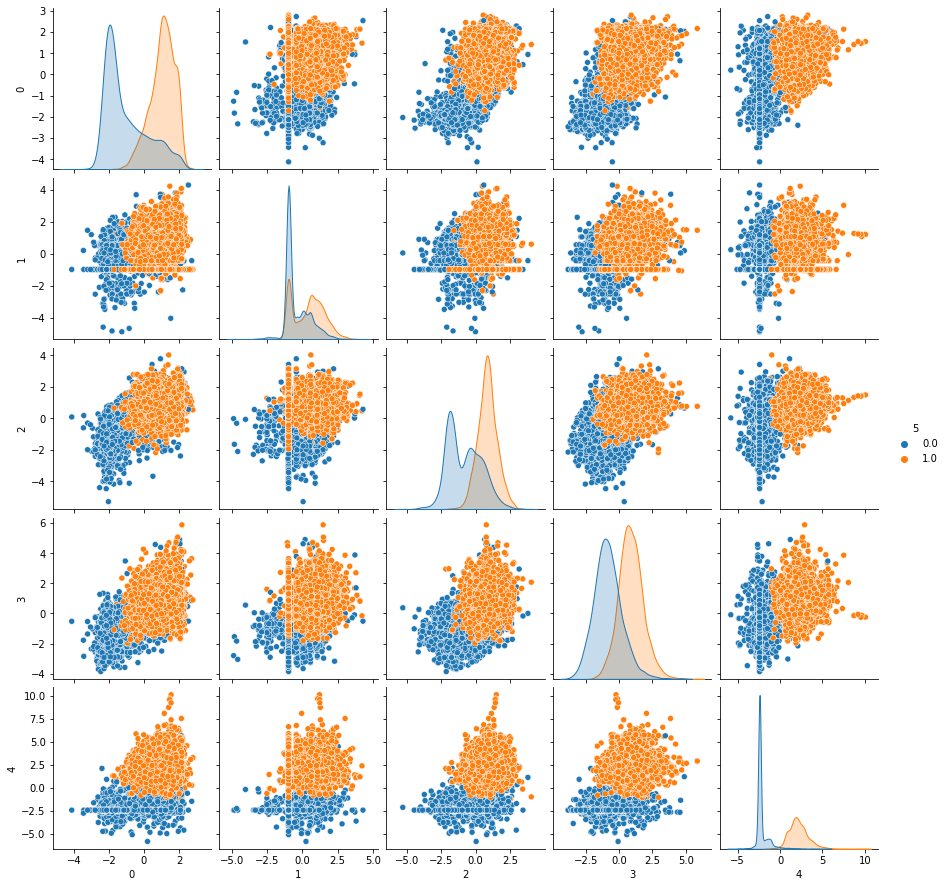

In [55]:
sns.pairplot(data_plot, hue = 5)

## Application of ANN model on concatenated reduced features

In [56]:
########### ANN FINAL MODEL #################

In [57]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(dataX_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

In [58]:
history = model.fit(dataX_train, Y_train, epochs=50, batch_size=16)

Epoch 1/50
570/570 [==============================] - 2s 2ms/step - loss: 0.3466 - accuracy: 0.8270
Epoch 2/50
570/570 [==============================] - 1s 2ms/step - loss: 0.1902 - accuracy: 0.9190
Epoch 3/50
570/570 [==============================] - 1s 2ms/step - loss: 0.1898 - accuracy: 0.9231
Epoch 4/50
570/570 [==============================] - 1s 1ms/step - loss: 0.1777 - accuracy: 0.9222
Epoch 5/50
570/570 [==============================] - 1s 1ms/step - loss: 0.1872 - accuracy: 0.9193
Epoch 6/50
570/570 [==============================] - 1s 1ms/step - loss: 0.1919 - accuracy: 0.9177
Epoch 7/50
570/570 [==============================] - 1s 2ms/step - loss: 0.1778 - accuracy: 0.9258
Epoch 8/50
570/570 [==============================] - 1s 1ms/step - loss: 0.1720 - accuracy: 0.9254
Epoch 9/50
570/570 [==============================] - 1s 2ms/step - loss: 0.1809 - accuracy: 0.9209
Epoch 10/50
570/570 [==============================] - 1s 2ms/step - loss: 0.1879 - accuracy: 0.9184

In [59]:
history_dict = history.history

In [60]:
acc = history_dict['accuracy']
# val_acc = history_dict['val_accuracy']
loss=history_dict['loss']
# val_loss=history_dict['val_loss']

In [61]:
epochs = range(1, len(acc) + 1)

In [62]:
import matplotlib.pyplot as plt

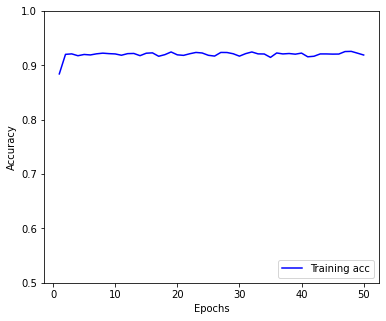

In [63]:
plt.figure(figsize=(6,5))
plt.plot(epochs, acc, label='Training acc', color = 'blue')
# plt.plot(epochs, val_acc, '+', label='Validation acc', color = 'red')
#plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

In [64]:
pred_test = model.predict_classes(dataX_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [65]:
pred_test

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [66]:
test_loss, test_acc = model.evaluate(dataX_test, Y_test)

87/87 [==============================] - 0s 1ms/step - loss: 0.2509 - accuracy: 0.9410


In [67]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, pred_test)
print(cm)

[[2123  113]
 [  50  475]]


In [68]:
print(classification_report(Y_test, pred_test))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2236
           1       0.81      0.90      0.85       525

    accuracy                           0.94      2761
   macro avg       0.89      0.93      0.91      2761
weighted avg       0.94      0.94      0.94      2761



In [69]:
Y_test.value_counts()

0    2236
1     525
Name: Target, dtype: int64